In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.datasets as sk_data
from sklearn.cluster import KMeans

#import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# Hierarchical Clustering

Today we will look at a fairly different approach to clustering.

So far, we have been thinking of clustering as finding a __partition__ of our dataset.

That is, a set of nonoverlapping clusters, in which each data item is in one cluster.

However, in many cases, the notion of a strict partition is not as useful.

## How Many Clusters?

How many clusters would you say there are here?

In [2]:
X_rand, y_rand = sk_data.make_blobs(n_samples=[100, 100, 250, 70, 75, 80], centers = [[1, 2], [1.5, 1], [3, 2], [1.75, 3.25], [2, 4], [2.25, 3.25]], n_features = 2,
                          center_box = (-10.0, 10.0), cluster_std = [.2, .2, .3, .1, .15, .15], random_state = 0)
df_rand = pd.DataFrame(np.column_stack([X_rand[:, 0], X_rand[:, 1], y_rand]), columns = ['X', 'Y', 'label'])
df_rand = df_rand.astype({'label': 'int'})
df_rand['label2'] = [{0: 0, 1: 1, 2: 2, 3: 3, 4: 3, 5: 3}[x] for x in df_rand['label']]
df_rand['label3'] = [{0: 0, 1: 0, 2: 1, 3: 2, 4: 2, 5: 2}[x] for x in df_rand['label']]
# kmeans = KMeans(init = 'k-means++', n_clusters = 3, n_init = 100)
# df_rand['label'] = kmeans.fit_predict(df_rand[['X', 'Y']])

/Users/crovella/miniconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


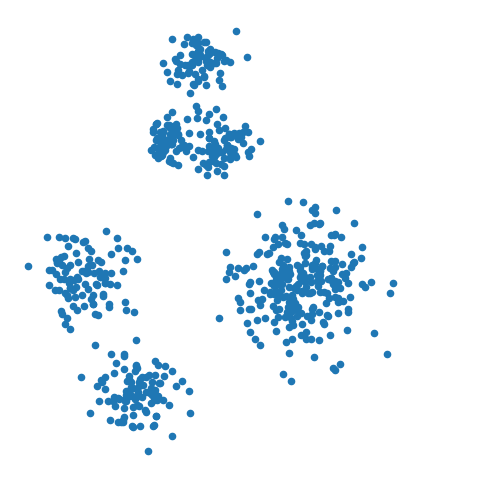

In [3]:
df_rand.plot('X', 'Y', kind = 'scatter', colormap='viridis', 
                   colorbar = False, figsize = (6, 6))
plt.axis('square')
plt.axis('off');

__Three clusters?__

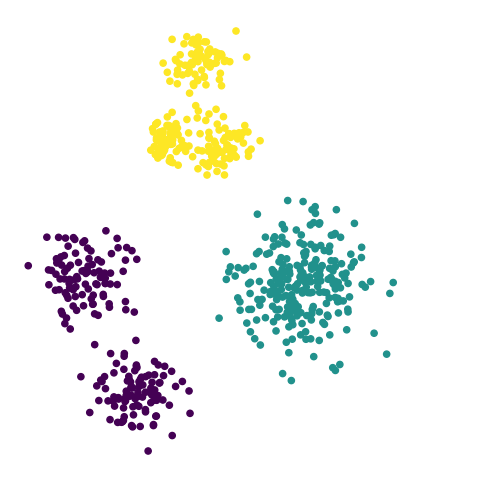

In [4]:
df_rand.plot('X', 'Y', kind = 'scatter', c = 'label3', colormap='viridis', 
                   colorbar = False, figsize = (6, 6))
plt.axis('square')
plt.axis('off');

__Four clusters?__

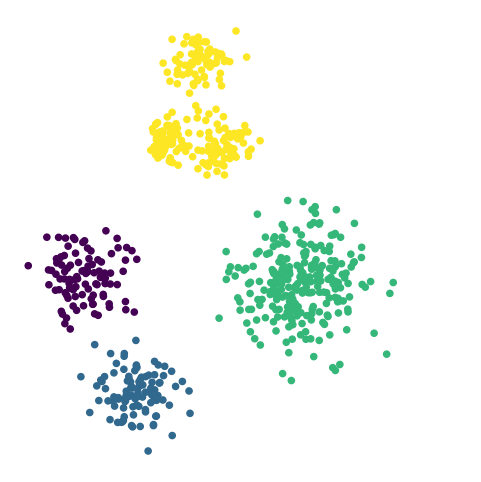

In [5]:
df_rand.plot('X', 'Y', kind = 'scatter', c = 'label2', colormap='viridis', 
                   colorbar = False, figsize = (6, 6))
plt.axis('square')
plt.axis('off');

__Six clusters?__

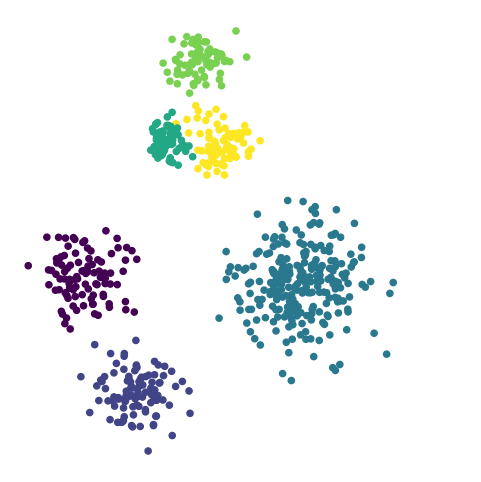

In [6]:
df_rand.plot('X', 'Y', kind = 'scatter', c = 'label', colormap='viridis', 
                   colorbar = False, figsize = (6, 6))
plt.axis('square')
plt.axis('off');

This dataset shows clustering on __multiple scales.__

To fully capture the structure in this dataset, two things are needed:
1. Capturing the differing clusters depending on the scale
2. Capturing the containment relations -- which clusters lie within other clusters

These observations motivate the notion of __hierarchical__ clustering.

In hierarchical clustering, we move away from the __partition__ notion of $k$-means, 

and instead capture a more complex arrangement that includes containment of one cluster within another.

## Hierarchical Clustering

A hierarchical clustering produces a set of __nested__ clusters organized into a tree.

A hierarchical clustering is visualized using a __dendrogram__ 

* A tree-like diagram that records the containment relations among clusters.

<center>

<img src="./figs/L08-dendrogram.png" width="600px">

</center>

### Strengths of Hierarchical Clustering

Hierarchical clustering has a number of advantages:

First, a hierarchical clustering encodes many __different__ clusterings.  That is, it does not itself decide on the correct number of clusters.  

A clustering is obtained by "cutting" the dendrogram at some level.

This means that you can make this crucial decision yourself, by inspecting the dendrogram.  

Put another way, you can obtain any desired number of clusters.

<center>

<img src="./figs/L08-dendrogram-cut.png" width="600px">

</center>

The second advantage is that the dendrogram may itself correspond to a meaningful structure, for example, a taxonomy.

<center>

<img src="figs/L08-animal-taxonomy.jpg" width="600px">

</center>

The third advantage is that many hierarchical clustering methods can be performed using either similarity (proximity) or dissimilarity (distance) metrics.

This can be very helpful! 

(Note that techniques like $k$-means cannot be used with unmodified similarity metrics.)

### Compared to $k$-means

Another aspect of hierachical clustering is that it can handle certain cases better than $k$-means.

Because of the nature of the $k$-means algorithm, $k$-means tends to produce:
* Roughly spherical clusters
* Clusters of approximately equal size
* Non-overlapping clusters

In many real-world situations, clusters may not be round, they may be of unequal size, and they may overlap.

Hence we would like clustering algorithms that can work in those cases also.

## Hierarchical Clustering Algorithms

There are two main approaches to hierarchical clustering: "bottom-up" and "top-down."

__Agglomerative__ Clustering ("bottom-up"):

* Start by defining each point as its own cluster
* At each successive step, merge the two clusters that are closest to each other
* Repeat until only one cluster is left.

__Divisive__ Clustering ("top-down"):
    
* Start with one, all-inclusive cluster
* At each step, find the cluster split that creates the largest distance between resulting clusters
* Repeat until each point is in its own cluster.

Agglomerative techniques are by far the more common.

The key to both of these methods is defining __the distance between two clusters.__

Different definitions for the inter-cluster distance yield different clusterings.

To illustrate the impact of the choice of cluster distances, we'll focus on agglomerative clustering.

### Defining Cluster Proximity

Given two clusters, how do we define the _distance_ between them?

Here are three natural ways to do it:
   * __Single-Linkage:__ the distance between two clusters is the distance between the closest two points that are in different clusters.
   
$$ D_\text{single}(i,j) = \min_{x, y}\{d(x, y) \,|\, x \in C_i, y \in C_j\}$$

* __Complete-Linkage:__ the distance between two clusters is the distance between the farthest two points that are in different clusters.

$$ D_\text{complete}(i,j) = \max_{x, y}\{d(x, y) \,|\, x \in C_i, y \in C_j\}$$

* __Average-Linkage:__ the distance between two clusters is the average distance between all pairs of points from different clusters.

$$ D_\text{average}(i,j) = \frac{1}{|C_i|\cdot|C_j|}\sum_{x \in C_i,\, y \in C_j}d(x, y)$$

<center>

<img src="./figs/L08-hierarchical-criteria.png" width="600px">

</center>

<div style = "float: left; width: 41%; text-align: center;">
    Single-Linkage
</div>
<div style = "float: left; width: 18%; text-align: center;">
    Complete-Linkage
</div>
<div style = "float: left; width: 41%; text-align: center;">
    Average-Linkage
</div>

Notice that it is easy to express the definitions above in terms of similarity instead of distance.

Here is a set of 6 points that we will cluster to show differences between distance metrics.

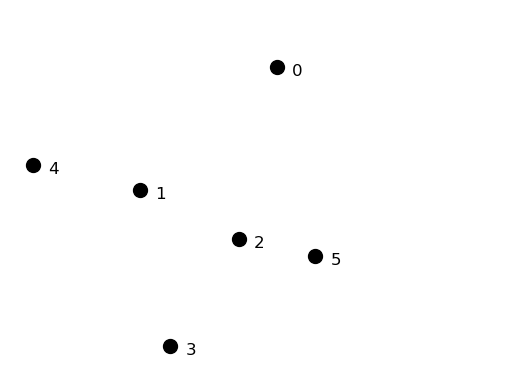

In [7]:
pt_x = [0.4, 0.22, 0.35, 0.26, 0.08, 0.45]
pt_y = [0.53, 0.38, 0.32, 0.19, 0.41, 0.30]
plt.plot(pt_x, pt_y, 'o', markersize = 10, color = 'k')
plt.ylim([.15, .60])
plt.xlim([0.05, 0.70])
for i in range(6):
    plt.annotate(f'{i}', (pt_x[i]+0.02, pt_y[i]-0.01), fontsize = 12)
plt.axis('off')
plt.savefig('figs/L08-basic-pointset.png');

In [8]:
X = np.array([pt_x, pt_y]).T
from scipy.spatial import distance_matrix
labels = ['p0', 'p1', 'p2', 'p3', 'p4', 'p5']
D = pd.DataFrame(distance_matrix(X, X), index = labels, columns = labels)
D.style.format('{:.2f}')

,p0,p1,p2,p3,p4,p5
p0,0.00,0.23,0.22,0.37,0.34,0.24
p1,0.23,0.00,0.14,0.19,0.14,0.24
p2,0.22,0.14,0.00,0.16,0.28,0.10
p3,0.37,0.19,0.16,0.00,0.28,0.22
p4,0.34,0.14,0.28,0.28,0.00,0.39
p5,0.24,0.24,0.10,0.22,0.39,0.00


### Single-Linkage Clustering

<img src="figs/L08-singlelink-pointset.png" width="100%">

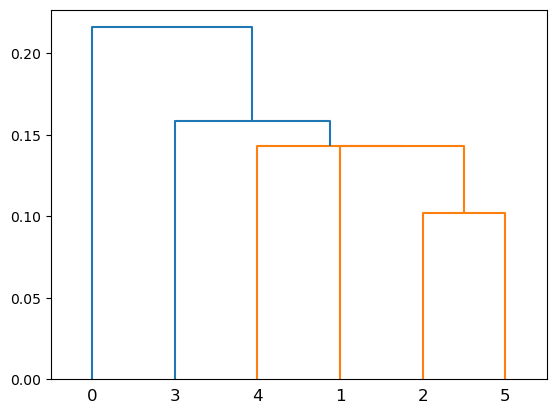

In [9]:
import scipy.cluster
import scipy.cluster.hierarchy as hierarchy
Z = hierarchy.linkage(X, method='single')
hierarchy.dendrogram(Z);

__Advantages__:

* Single-linkage clustering can handle non-elliptical shapes.

In fact it can produce long, elongated clusters:

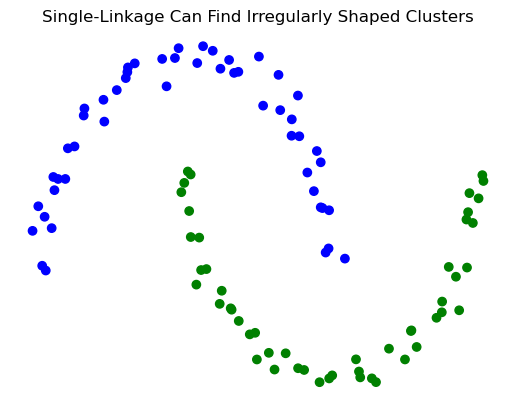

In [10]:
X_moon_05, y_moon_05 = sk_data.make_moons(random_state = 0, noise = 0.05)
Z = hierarchy.linkage(X_moon_05, method='single')
labels = hierarchy.fcluster(Z, 2, criterion = 'maxclust')
plt.scatter(X_moon_05[:,0], X_moon_05[:,1], c = [['b','g'][i-1] for i in labels])
plt.title('Single-Linkage Can Find Irregularly Shaped Clusters')
plt.axis('off');

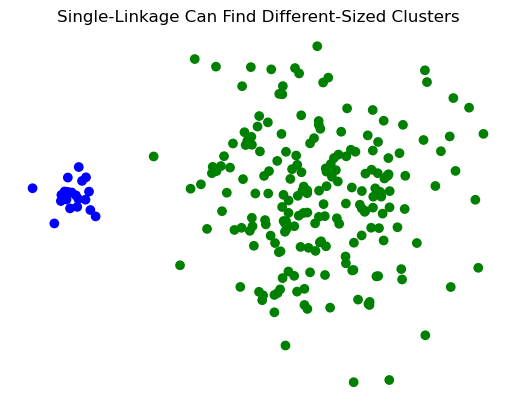

In [11]:
X_rand_lo, y_rand_lo = sk_data.make_blobs(n_samples=[20, 200], centers = [[1, 1], [3, 1]], n_features = 2,
                          center_box = (-10.0, 10.0), cluster_std = [.1, .5], random_state = 0)
Z = hierarchy.linkage(X_rand_lo, method='single')
labels = hierarchy.fcluster(Z, 2, criterion = 'maxclust')
plt.scatter(X_rand_lo[:,0], X_rand_lo[:,1], c = [['b','g'][i-1] for i in labels])
plt.title('Single-Linkage Can Find Different-Sized Clusters')
plt.axis('off');

__Disadvantages:__ 

* Single-linkage clustering can be sensitive to noise and outliers.

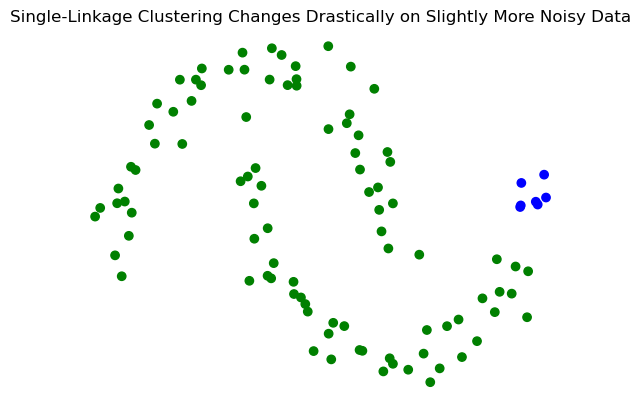

In [12]:
X_moon_10, y_moon_10 = sk_data.make_moons(random_state = 0, noise = 0.1)
Z = hierarchy.linkage(X_moon_10, method='single')
labels = hierarchy.fcluster(Z, 2, criterion = 'maxclust')
plt.scatter(X_moon_10[:,0], X_moon_10[:,1], c = [['b','g'][i-1] for i in labels])
plt.title('Single-Linkage Clustering Changes Drastically on Slightly More Noisy Data')
plt.axis('off');

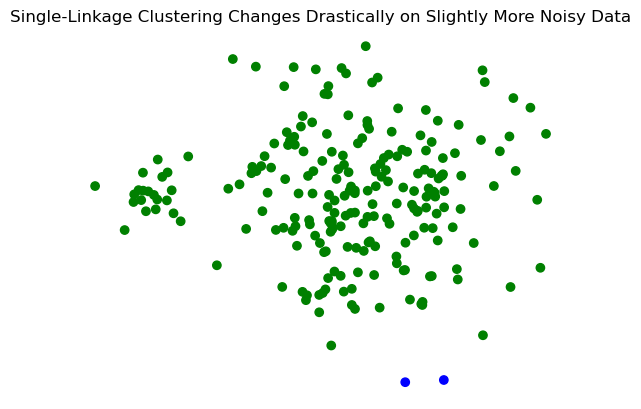

In [13]:
X_rand_hi, y_rand_hi = sk_data.make_blobs(n_samples=[20, 200], centers = [[1, 1], [3, 1]], n_features = 2,
                          center_box = (-10.0, 10.0), cluster_std = [.15, .6], random_state = 0)
Z = hierarchy.linkage(X_rand_hi, method='single')
labels = hierarchy.fcluster(Z, 2, criterion = 'maxclust')
plt.title('Single-Linkage Clustering Changes Drastically on Slightly More Noisy Data')
plt.scatter(X_rand_hi[:,0], X_rand_hi[:,1], c = [['b','g'][i-1] for i in labels])
plt.axis('off');

### Complete-Linkage Clustering

<img src="figs/L08-completelink-pointset.png" width="100%">

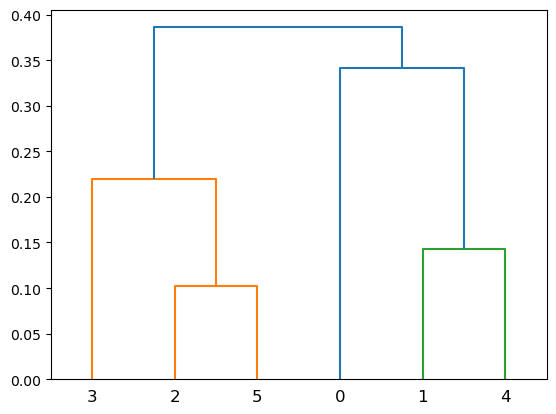

In [14]:
Z = hierarchy.linkage(X, method='complete')
hierarchy.dendrogram(Z);

__Advantages__:

* Produces more-balanced clusters -- more-equal diameters

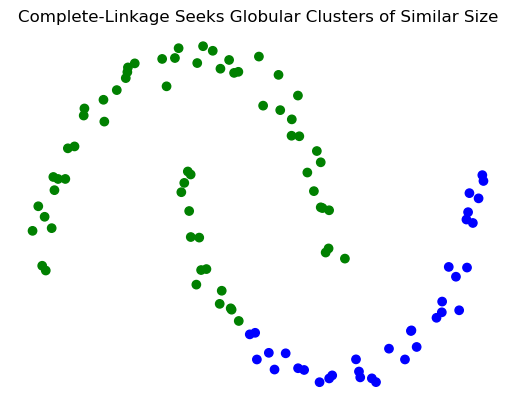

In [15]:
X_moon_05, y_moon_05 = sk_data.make_moons(random_state = 0, noise = 0.05)
Z = hierarchy.linkage(X_moon_05, method='complete')
labels = hierarchy.fcluster(Z, 2, criterion = 'maxclust')
plt.scatter(X_moon_05[:,0], X_moon_05[:,1], c = [['b','g'][i-1] for i in labels])
plt.title('Complete-Linkage Seeks Globular Clusters of Similar Size')
plt.axis('off');

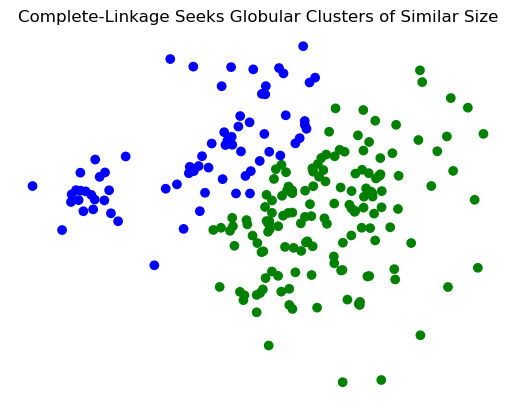

In [16]:
Z = hierarchy.linkage(X_rand_hi, method='complete')
labels = hierarchy.fcluster(Z, 2, criterion = 'maxclust')
plt.scatter(X_rand_hi[:,0], X_rand_hi[:,1], c = [['b','g'][i-1] for i in labels])
plt.title('Complete-Linkage Seeks Globular Clusters of Similar Size')
plt.axis('off');

Less susceptible to noise:

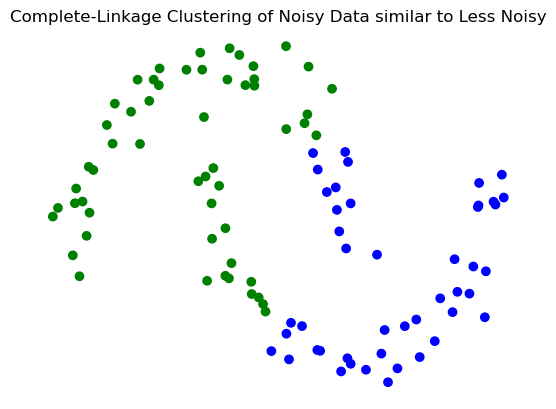

In [17]:
Z = hierarchy.linkage(X_moon_10, method='complete')
labels = hierarchy.fcluster(Z, 2, criterion = 'maxclust')
plt.scatter(X_moon_10[:,0], X_moon_10[:,1], c = [['b','g'][i-1] for i in labels])
plt.title('Complete-Linkage Clustering of Noisy Data similar to Less Noisy')
plt.axis('off');

### Average-Linkage Clustering

<img src="figs/L08-averagelink-pointset.png" width="100%">

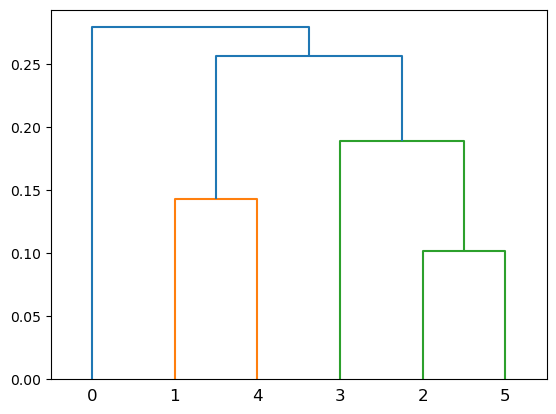

In [18]:
Z = hierarchy.linkage(X, method='average')
hierarchy.dendrogram(Z);

Average-Linkage clustering is in some sense a compromise between Single-linkage and Complete-linkage clustering.

__Strengths:__
    
* Less susceptible to noise and outliers

__Limitations:__
    
* Biased toward elliptical clusters

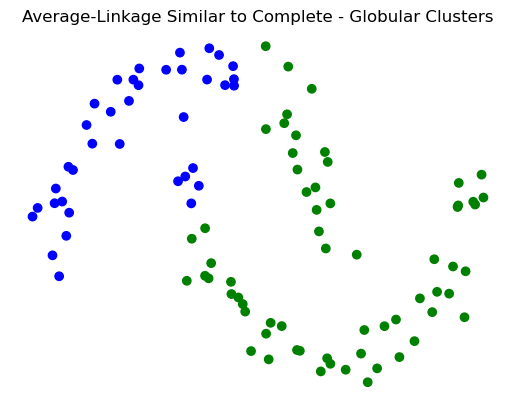

In [19]:
Z = hierarchy.linkage(X_moon_10, method='average')
labels = hierarchy.fcluster(Z, 2, criterion = 'maxclust')
plt.scatter(X_moon_10[:,0], X_moon_10[:,1], c = [['b','g'][i-1] for i in labels])
plt.title('Average-Linkage Similar to Complete - Globular Clusters')
plt.axis('off');

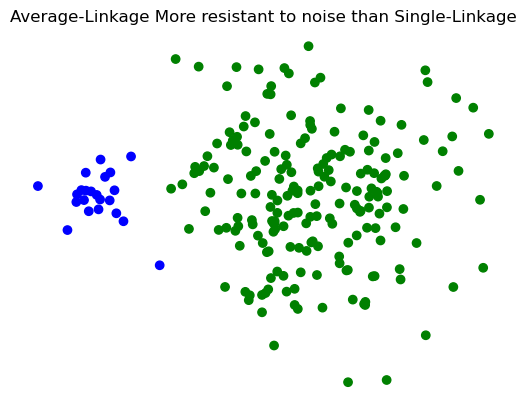

In [20]:
Z = hierarchy.linkage(X_rand_hi, method='average')
labels = hierarchy.fcluster(Z, 2, criterion = 'maxclust')
plt.scatter(X_rand_hi[:,0], X_rand_hi[:,1], c = [['b','g'][i-1] for i in labels])
plt.title('Average-Linkage More resistant to noise than Single-Linkage')
plt.axis('off');

### All Three Compared

<div style = "float: left; width: 33%; text-align: center;">
    <img src="figs/L08-singlelink-pointset.png" style="width:100%">
    Single-Linkage
</div>
<div style = "float: left; width: 33%; text-align: center;">
    <img src="figs/L08-completelink-pointset.png"  style="width:100%">
    Complete-Linkage
</div>
<div style = "float: left; width: 33%; text-align: center;">
    <img src="figs/L08-averagelink-pointset.png" style="width:100%">
    Average-Linkage
</div>

## Ward's Distance

Finally, we consider one more cluster distance.

Ward's distance asks "what if".

That is, "What if we combined these two clusters -- how would clustering improve?"

To define "how would clustering improve?" we appeal to the $k$-means criterion.

So:

__Ward's Distance__ between clusters $C_i$ and $C_j$ is the difference between the total within cluster sum of squares for the two clusters separately, __compared to__ the within cluster sum of squares resulting from merging the two clusters into a new cluster $C_{i+j}$:

$$D_\text{Ward}(i, j) = \sum_{x \in C_i} (x - r_i)^2 + \sum_{x \in C_j} (x - r_j)^2  - \sum_{x \in C_{i+j}} (x - r_{i+j})^2 $$

where $r_i, r_j, r_{i+j}$ are the corresponding cluster centroids.

In a sense, this cluster distance results in a hierarchical analog of $k$-means.

As a result, it has properties similar to $k$-means:
    
* Less susceptible to noise and outliers
* Biased toward elliptical clusters

Hence it tends to behave more like group-average hierarchical clustering.

## Hierarchical Clustering In Practice

Now we'll look at doing hierarchical clustering in practice, using python.

We'll use the same synthetic data as we did in the k-means case -- ie.,
three "blobs" living in 30 dimensions.

In [21]:
X, y = sk_data.make_blobs(n_samples=100, centers=3, n_features=30,
                          center_box=(-10.0, 10.0),random_state=0)

As a reminder of the raw data here is the visualization: first the raw data, then an embedding into 2-D (using MDS).

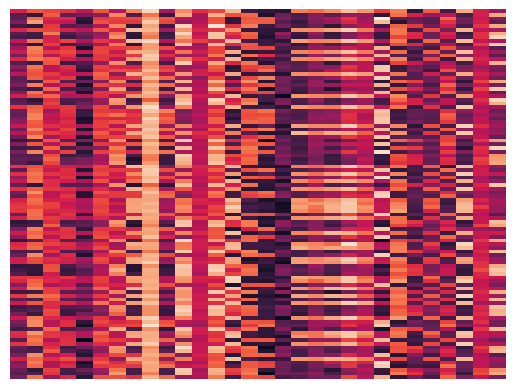

In [22]:
sns.heatmap(X, xticklabels=False, yticklabels=False, linewidths=0,cbar=False);

/Users/crovella/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


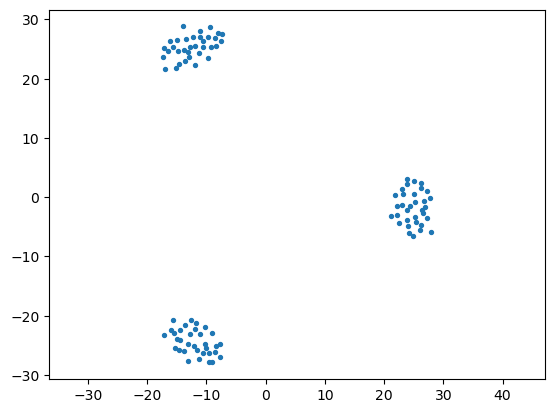

In [23]:
import sklearn.manifold
import sklearn.metrics as metrics
euclidean_dists = metrics.euclidean_distances(X)
mds = sklearn.manifold.MDS(n_components = 2, max_iter = 3000, eps = 1e-9, random_state = 0,
                   dissimilarity = "precomputed", n_jobs = 1)
fit = mds.fit(euclidean_dists)
pos = fit.embedding_
plt.axis('equal')
plt.scatter(pos[:, 0], pos[:, 1], s = 8);

Hierarchical clustering is available in __`sklearn`__, but there is a much more fully developed set of tools in the __`scipy`__ package and that is the one to use.

In [24]:
import scipy.cluster
import scipy.cluster.hierarchy as hierarchy
import scipy.spatial.distance

# linkages = ['single','complete','average','weighted','ward']
Z = hierarchy.linkage(X, method = 'single')

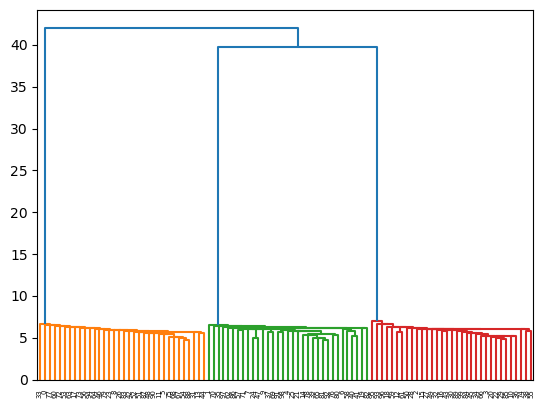

In [25]:
R = hierarchy.dendrogram(Z)

## Hierarchical Clustering Real Data

Once again we'll use the "20 Newsgroup" data provided as example data in sklearn.

(http://scikit-learn.org/stable/datasets/twenty_newsgroups.html).

In [26]:
from sklearn.datasets import fetch_20newsgroups
categories = ['comp.os.ms-windows.misc', 'sci.space','rec.sport.baseball']
news_data = fetch_20newsgroups(subset = 'train', categories = categories)

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', min_df = 4, max_df = 0.8)
data = vectorizer.fit_transform(news_data.data).todense()
data.shape

(1781, 9409)

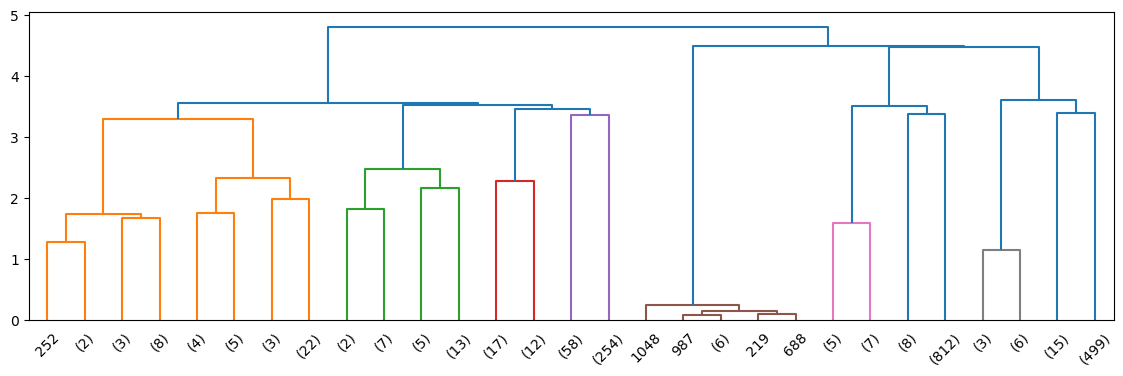

In [28]:
# metrics can be ‘braycurtis’, ‘canberra’, ‘chebyshev’, ‘cityblock’, ‘correlation’, ‘cosine’, 
# ‘dice’, ‘euclidean’, ‘hamming’, ‘jaccard’, ‘kulsinski’, ‘mahalanobis’, ‘matching’, 
# ‘minkowski’, ‘rogerstanimoto’, ‘russellrao’, ‘seuclidean’, ‘sokalmichener’, ‘sokalsneath’, 
# ‘sqeuclidean’, ‘yule’.
Z_20ng = hierarchy.linkage(data, method = 'ward', metric = 'euclidean')
plt.figure(figsize=(14,4))
R_20ng = hierarchy.dendrogram(Z_20ng, p=4, truncate_mode = 'level', show_leaf_counts=True)

### Selecting the Number of Clusters

In [29]:
clusters = hierarchy.fcluster(Z_20ng, 3, criterion = 'maxclust')
print(clusters.shape)
clusters

(1781,)


array([3, 3, 3, ..., 1, 3, 1], dtype=int32)

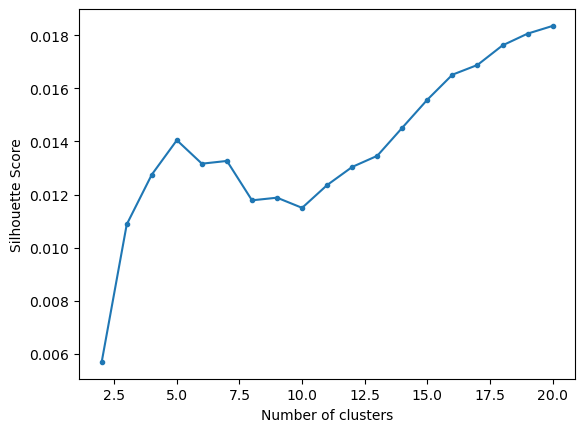

In [33]:
max_clusters = 20
s = np.zeros(max_clusters+1)
for k in range(2, max_clusters+1):
    clusters = hierarchy.fcluster(Z_20ng, k, criterion = 'maxclust')
    s[k] = metrics.silhouette_score(np.asarray(data), clusters, metric = 'euclidean')
plt.plot(range(2, len(s)), s[2:], '.-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score');

In [35]:
print('Top Terms Per Cluster:')
k = 5
clusters = hierarchy.fcluster(Z_20ng, k, criterion = 'maxclust')
for i in range(1,k+1):
    items = np.array([item for item,clust in zip(data, clusters) if clust == i])
    centroids = np.squeeze(items).mean(axis = 0)
    asc_order_centroids = centroids.argsort()#[:, ::-1]
    order_centroids = asc_order_centroids[::-1]
    terms = vectorizer.get_feature_names_out()
    print(f'Cluster {i}:')
    for ind in order_centroids[:10]:
        print(f' {terms[ind]}')
    print('')

Top Terms Per Cluster:
Cluster 1:
 space
 nasa
 edu
 henry
 gov
 alaska
 access
 com
 moon
 digex

Cluster 2:
 ax
 max
 b8f
 g9v
 a86
 145
 1d9
 pl
 2di
 0t

Cluster 3:
 edu
 com
 year
 baseball
 article
 writes
 cs
 team
 game
 university

Cluster 4:
 risc
 instruction
 ghhwang
 csie
 set
 nctu
 cisc
 tw
 reduced
 mq

Cluster 5:
 windows
 edu
 file
 dos
 com
 files
 card
 drivers
 driver
 use

